# Tips and tricks for coding with CoPilot

Generative AI can be a massive help when coding - if used correctly. CoPilot, chatGPT and others are "Large Language Models" (LLM), which basically have the ability to ingest vast amounts of text and generate statistical relations between words. *In simple terms, an LLM ingest all the language content available to it (in the internet), and predict what word is more likely to follow another*. 

Maybe you are familiar with the [Infinite monkey theorem](https://en.wikipedia.org/wiki/Infinite_monkey_theorem#:~:text=The%20infinite%20monkey%20theorem%20states,complete%20works%20of%20William%20Shakespeare.): given enough time, a monkey hitting keys at random on a type writter will eventually produce the complete works of Shakespeare. LLMs are essentially a highly-intuitive version of that monkey, so it is very likely to produce the complete works (plus minus some errors) immediately, rather than in a time that tends to infinity.

**This goes to saying that CoPilot answers must always be taken with a grain of salt and not as an absolute truth**. In order to maximise the benefits you can obtain from its answers, remember:

##### 1. Context matters
Give a bit of background information on what you are doing. You can start by saying "I'm doing an assignment for a university oceanography course, and I need to use python to analyse a dataset and produce a figure". Or something like that. 

##### 2. Be specific
The more information you give CoPilot, the better. Remember it is basically a statistical relationship between words, so feed it words! Don't ask *"How can I plot temperature?"*, expand: *"I am working with python and I have a netCDF with ocean surface temperature. I'd like to plot a global map of the time mean. How can I do that?"* Doing this will improve the quality of the answer you get. 

##### 3. Focus on outcomes
Be clear on what you expect to obtain from CoPilot. For this course it is mostly going to be lines of code, and you'll probably want them commented so you understand what each piece does. Ask for this.

##### 4. Refine and iterate
As your requests get more complex, it is likely that you won't get the correct answer immediately. You will have to tweak your requests and refine them based on what you obtained initially until you get the answer you think is correct. 

##### 5. Judge
Remember that you are the expert, you are able to understand concepts. CoPilot just generates statistically sensible answers. Do check whether the answers make sense or are just gibberish. Sometimes you will need to restart the conversations because you have entered an infinite loop of *Yes, you are correct, my previous answer was wrong and I apologise for the confusion. Here is another wrong answer" from which CoPilot can not escape.

##### 6. Ask CoPilot how to use CoPilot
If you are brave enough.

## Using CoPilot to look at sea ice around Antarctica

Let's see if starting with nothing, we can use CoPilot to produce a figure of the seasonal cycle of sea ice extent around Antarctica.

**DISCLAIMER: there is no guarantee that by giving these exact same prompts you will get the exact same answers. There is an element of randomness to CoPilot**.

Let's start by giving CoPilot some background information:

$\quad \quad$ **Me:** *I am doing a university oceanography course, and I would like to create a Jupyter notebook from scratch just by using CoPilot. The end goal is to produce a figure with the seasonal cycle of sea ice concentration around Antarctica. I will ask you how to do things step by step, so don't create anything yet. I want you to comment all the lines of code you give me so I can understand what they are doing.*

$\quad \quad$ **CoPilot:** *A whole load of text and code* even though I had asked to not create anything yet. Most of the code is not what I want, and it is opening imaginary datasets I don't have yet. So let's just ignore it and move on.

Let's ask for the first task (open the data):

$\quad \quad$ **Me:** *I would like to start by opening from the Jupyter notebook, NSIDC's sea ice concentraton monthly product from 1978 until precent date (https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4shmday) using xarray.* Note I have given it a little tip, steering it in the right direction by asking it to use xarray.

$\quad \quad$ **CoPilot**:    

In [1]:
import xarray as xr

url = "https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4shmday"
ds = xr.open_dataset(url)

print(ds.info())

xarray.Dataset {
dimensions:
	time = 548 ;
	ygrid = 332 ;
	xgrid = 316 ;

variables:
	datetime64[ns] time(time) ;
		time:_ChunkSizes = 1024 ;
		time:_CoordinateAxisType = Time ;
		time:actual_range = [2.787264e+08 1.717200e+09] ;
		time:axis = T ;
		time:ioos_category = Time ;
		time:long_name = ANSI date ;
		time:standard_name = time ;
		time:time_origin = 01-JAN-1970 00:00:00 ;
	float32 ygrid(ygrid) ;
		ygrid:_ChunkSizes = 332 ;
		ygrid:actual_range = [-3937500.  4337500.] ;
		ygrid:axis = Y ;
		ygrid:ioos_category = Location ;
		ygrid:long_name = projection_grid_y_centers ;
		ygrid:standard_name = projection_y_coordinate ;
		ygrid:units = meters ;
		ygrid:valid_range = [-3950000.  4350000.] ;
	float32 xgrid(xgrid) ;
		xgrid:_ChunkSizes = 316 ;
		xgrid:actual_range = [-3937500.  3937500.] ;
		xgrid:axis = X ;
		xgrid:ioos_category = Location ;
		xgrid:long_name = projection_grid_x_centers ;
		xgrid:standard_name = projection_x_coordinate ;
		xgrid:units = meters ;
		xgrid:valid_range

Note: I don't think this way of visualising is very useful. I think it's much better do this:

In [2]:
ds

<xarray.Dataset>
Dimensions:                           (time: 548, ygrid: 332, xgrid: 316)
Coordinates:
  * time                              (time) datetime64[ns] 1978-11-01 ... 20...
  * ygrid                             (ygrid) float32 4.338e+06 ... -3.938e+06
  * xgrid                             (xgrid) float32 -3.938e+06 ... 3.938e+06
Data variables:
    cdr_seaice_conc_monthly           (time, ygrid, xgrid) float32 ...
    nsidc_bt_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    nsidc_nt_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    qa_of_cdr_seaice_conc_monthly     (time, ygrid, xgrid) float32 ...
    stdev_of_cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 ...
Attributes: (12/66)
    _NCProperties:                                       version=2,netcdf=4.8...
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2024-06-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 1978-11-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

Let's ask CoPilot to plot us a time mean figure (giving it some information on the dataset).

$\quad \quad$ **Me:** *This dataset (ds) comes in a polar stereographic projection, with xgrid, ygrid dimensions consisting in the distance in m from the south pole. Can you write code for me to plot the time mean of ds, using the appropriate cartographic projection, complete with land and gridlines?*

$\quad \quad$ **CoPilot:**

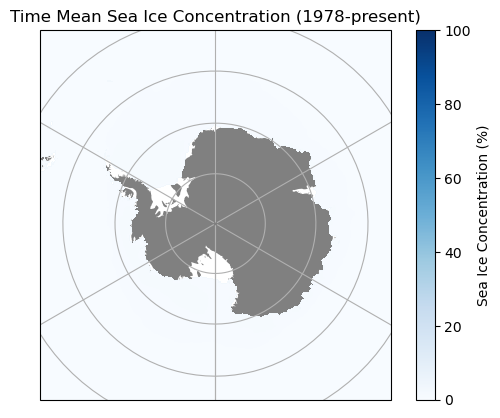

In [3]:
mean_concentration = ds['cdr_seaice_conc_monthly'].mean(dim='time')

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Create a figure and axis with a polar stereographic projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Plot sea ice concentration
im = ax.pcolormesh(mean_concentration['xgrid'], mean_concentration['ygrid'], mean_concentration,
                   transform=ccrs.SouthPolarStereo(), cmap='Blues', vmin=0, vmax=100)

# Add land and gridlines
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.gridlines()

# Set title and labels
ax.set_title('Time Mean Sea Ice Concentration (1978-present)')
ax.set_xlabel('X Distance from South Pole (m)')
ax.set_ylabel('Y Distance from South Pole (m)')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Sea Ice Concentration (%)')

# Show the plot
plt.show()

Note: CoPilot has assumed that concentration is given in %, but in reality it goes from 0 to 1. Let's correct that and plot again:

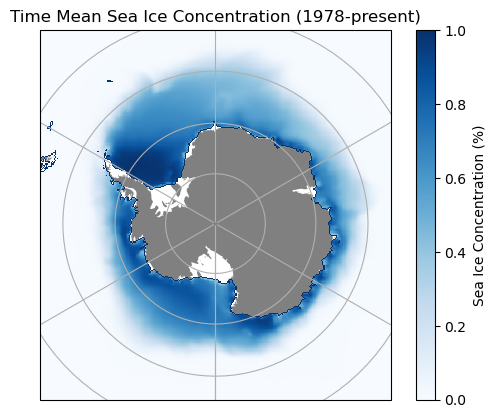

In [4]:
mean_concentration = ds['cdr_seaice_conc_monthly'].mean(dim='time')

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Create a figure and axis with a polar stereographic projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.SouthPolarStereo()})

# Plot sea ice concentration
im = ax.pcolormesh(mean_concentration['xgrid'], mean_concentration['ygrid'], mean_concentration,
                   transform=ccrs.SouthPolarStereo(), cmap='Blues', vmin=0, vmax=1)

# Add land and gridlines
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.gridlines()

# Set title and labels
ax.set_title('Time Mean Sea Ice Concentration (1978-present)')
ax.set_xlabel('X Distance from South Pole (m)')
ax.set_ylabel('Y Distance from South Pole (m)')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Sea Ice Concentration (%)')

# Show the plot
plt.show()

$\quad \quad$ **Me:** *Can you calculate the seasonal cycle of sea ice concentration from ds?*

$\quad \quad$ **CoPilot:**

In [5]:
seasonal_cycle = ds['cdr_seaice_conc_monthly'].groupby('time.month').mean(dim='time')

And as a bonus it's given me this to visualize (which won't work):

In [6]:
import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' are variables from your grid dataset
plt.figure(figsize=(10, 6))
plt.plot(seasonal_cycle['longitude'], seasonal_cycle['latitude'], marker='o', label='Seasonal Cycle')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Seasonal Cycle of Sea Ice Concentration')
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'longitude'

<Figure size 1000x600 with 0 Axes>

... because it hasn't quite yet understood what we want to do yet. Probably because we have not asked it to visualise anything. Too eager CoPilot, too eager.

$\quad \quad$ **Me:** *Using our seasonal_cycle, can you create a figure similar to the mean_concentration one but with 12 panels, one for each month in seasonal_cycle? Please add titles to each panel that tell what month is being plotted.*

$\quad \quad$ **CoPilot:**

C:\Users\jmneme\AppData\Local\Temp\ipykernel_23288\3734757388.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


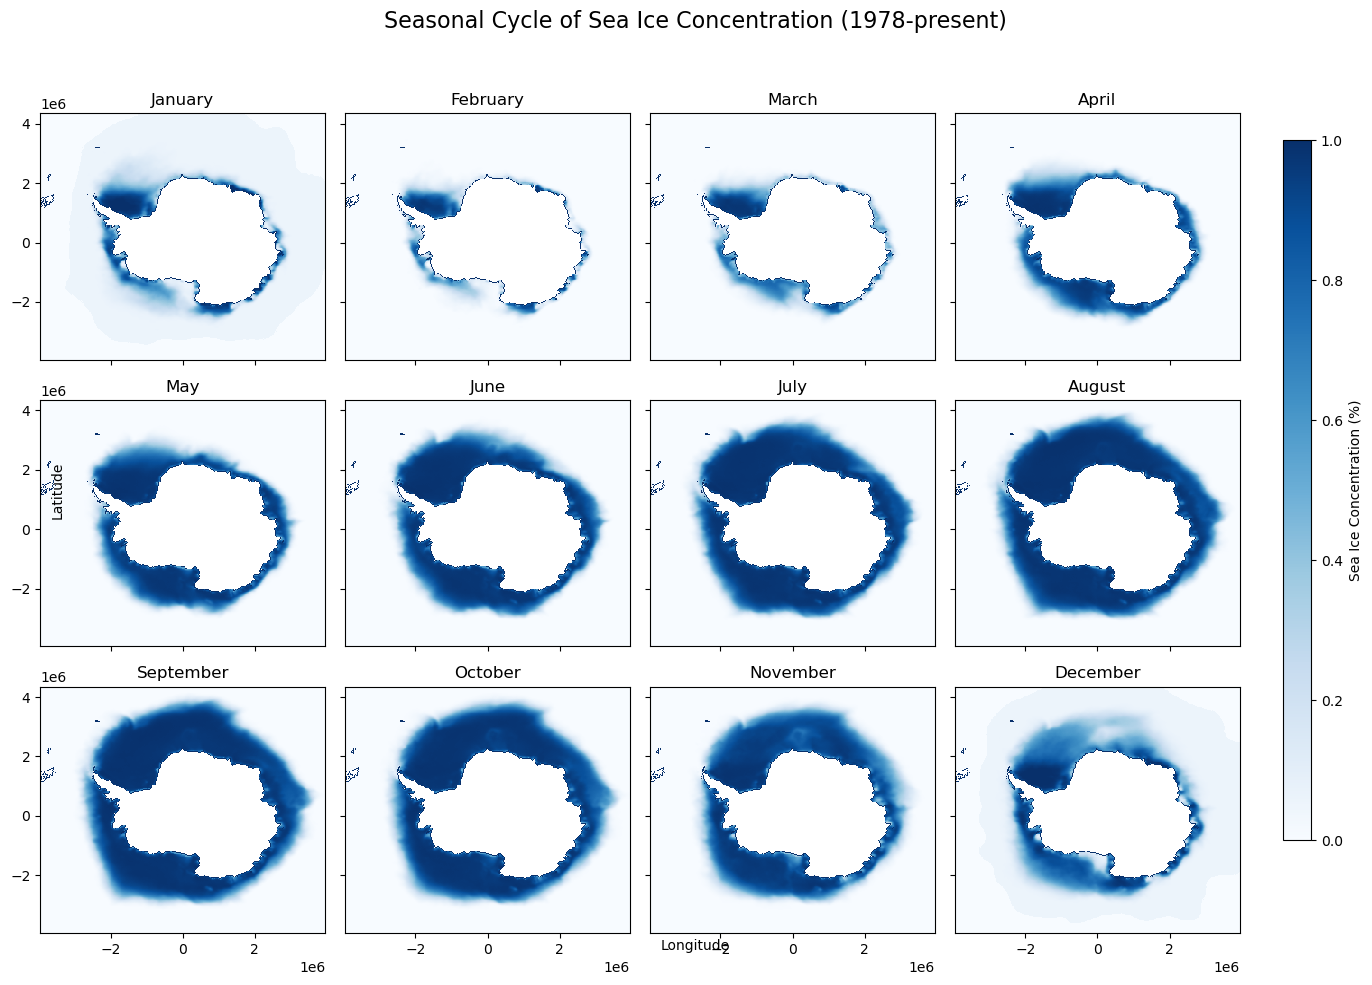

In [7]:
import matplotlib.pyplot as plt
import calendar

# Create a 3x4 grid of subplots (12 panels)
fig, axs = plt.subplots(3, 4, figsize=(14, 10), sharex=True, sharey=True)

# Iterate over each month
for month in range(1, 13):
    ax = axs[(month - 1) // 4, (month - 1) % 4]  # Get the appropriate subplot
    ax.pcolormesh(seasonal_cycle['xgrid'], seasonal_cycle['ygrid'],
                  seasonal_cycle.sel(month=month),
                  cmap='Blues', vmin=0, vmax=1)
    ax.set_title(calendar.month_name[month])  # Set the title with the month name

# Add common labels
fig.text(0.5, 0.04, 'Longitude', ha='center')
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(axs[0, 0].collections[0], cax=cbar_ax, label='Sea Ice Concentration (%)')

# Set overall title
fig.suptitle('Seasonal Cycle of Sea Ice Concentration (1978-present)', fontsize=16)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# Show the plot
plt.show()

Note: I had to correct in the code above the extent to get to `vmax = 1` again. Plus CoPilot has the memory of a fish and forgot that I wanted my figures in the correct cartographic projection, complete with land and gridlines. Let's try again:

$\quad \quad$ **Me:** *Using our seasonal_cycle, can you create a figure with 12 panels, one for each month in seasonal_cycle? Please add titles to each panel that tell what month is being plotted, as well as using the correct cartographic correction, add land and gridlines.*

$\quad \quad$ **CoPilot:**

AttributeError: 'Axes' object has no attribute 'add_feature'

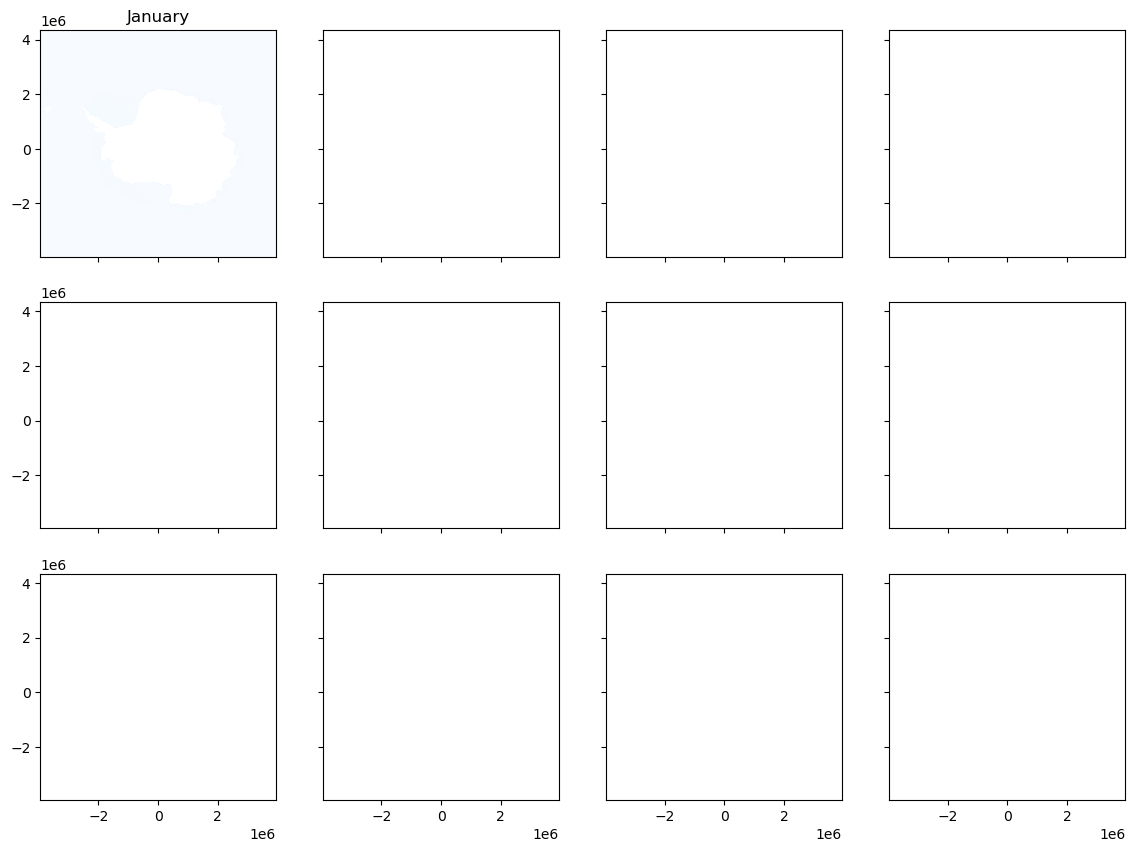

In [8]:
import matplotlib.pyplot as plt
import calendar

# Create a 3x4 grid of subplots (12 panels)
fig, axs = plt.subplots(3, 4, figsize=(14, 10), sharex=True, sharey=True)

# Iterate over each month
for month in range(1, 13):
    ax = axs[(month - 1) // 4, (month - 1) % 4]  # Get the appropriate subplot
    im = ax.pcolormesh(seasonal_cycle['xgrid'], seasonal_cycle['ygrid'], seasonal_cycle.sel(month=month),
                       cmap='Blues', vmin=0, vmax=100)
    ax.set_title(calendar.month_name[month])  # Set the title with the month name

    # Add land and gridlines (cartographic correction)
    ax.add_feature(cfeature.LAND, facecolor='gray')
    ax.gridlines()

# Add common labels
fig.text(0.5, 0.04, 'Longitude', ha='center')
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical')

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(im, cax=cbar_ax, label='Sea Ice Concentration (%)')

# Set overall title
fig.suptitle('Seasonal Cycle of Sea Ice Concentration (1978-present)', fontsize=16)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# Show the plot
plt.show()

Not quite there yet, but we can fix it ourselves using the first figure we asked to create for `mean_concentration`:

C:\Users\jmneme\AppData\Local\Temp\ipykernel_23288\62142317.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


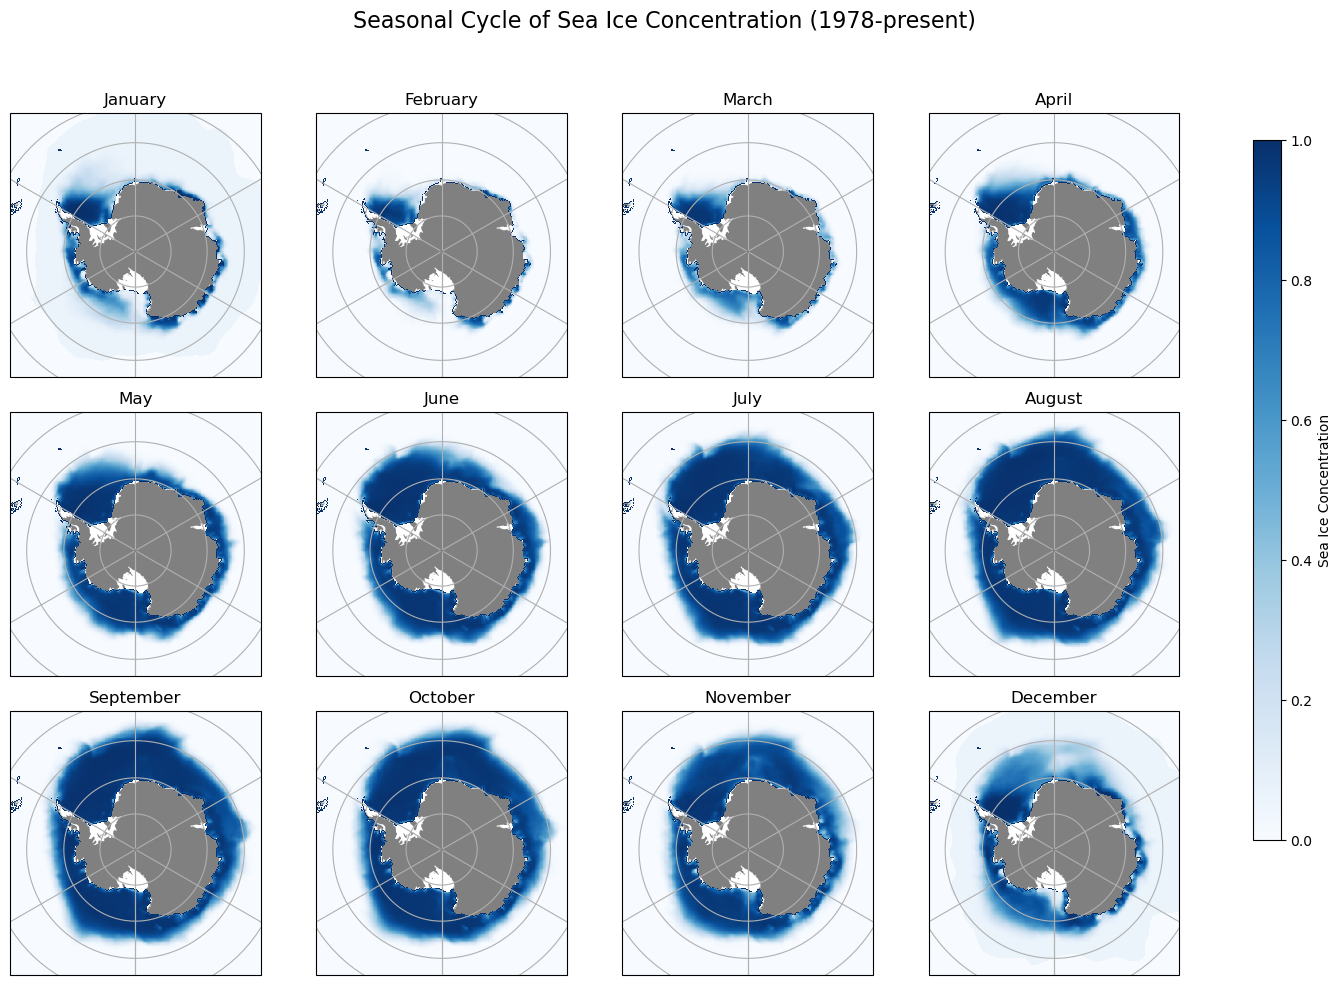

In [9]:
import matplotlib.pyplot as plt
import calendar

# Create a 3x4 grid of subplots (12 panels)
fig, axs = plt.subplots(3, 4, figsize=(14, 10), sharex=True, sharey=True,
                        subplot_kw={'projection': ccrs.SouthPolarStereo()}) # Add the projection

# Iterate over each month
for month in range(1, 13):
    ax = axs[(month - 1) // 4, (month - 1) % 4]  # Get the appropriate subplot
    im = ax.pcolormesh(seasonal_cycle['xgrid'], seasonal_cycle['ygrid'], seasonal_cycle.sel(month=month),
                       cmap='Blues', vmin=0, vmax=1)
    ax.set_title(calendar.month_name[month])  # Set the title with the month name

    # Add land and gridlines (cartographic correction)
    ax.add_feature(cfeature.LAND, facecolor='gray')
    ax.gridlines()

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = plt.colorbar(im, cax=cbar_ax, label='Sea Ice Concentration')

# Set overall title
fig.suptitle('Seasonal Cycle of Sea Ice Concentration (1978-present)', fontsize=16)

# Adjust spacing
plt.tight_layout(rect=[0, 0, 0.9, 0.95])

# Show the plot
plt.show()

Fun fact: look what a non-specific-prompt generated for me!

$\quad \quad$ **Me:** *This is great! Can you now make me a figure with 12 panels, where you plot a map of the climatology for each month on each panel? Please use the relevant cartographic projection, add land, gridlines, titles for each panel, and a colorbar that is colorblind friendly."*

$\quad \quad$ **CoPilot:**

<p align="center">
<img src="images/Copilot_fun.png" width="20%"/>
</p>

$\quad \quad$ **Me:** *Now I would like you to calculate a time series of sea ice extent. Sea ice extent is defined as the area integral of the concentrations that are more than 0.15 in value. So please do a cumulative sum of every gridpoint where concentration exceeds 0.15, weigthing by the cell area that you can calculate from the xgrid, ygrid coordinates. Please write the code in python with explanatory comments*.

$\quad \quad$ **CoPilot:**

In [10]:
# Calculate the cell area (assuming xgrid and ygrid are in meters)
cell_area = -(ds['xgrid'].diff('xgrid') * ds['ygrid'].diff('ygrid'))

# Create a mask where concentration exceeds 0.15
ice_mask = (ds['cdr_seaice_conc_monthly'] > 0.15)

# Calculate the weighted sum of cell areas where ice concentration exceeds 0.15
sea_ice_extent = (ice_mask * cell_area).sum(dim=['xgrid', 'ygrid'])

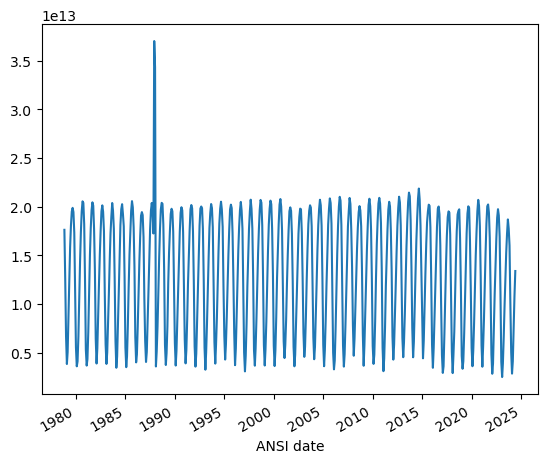

In [11]:
sea_ice_extent.plot()

$\quad \quad$ **Me:** *Now, can you plot the anual averages of sea_ice_extent?*

$\quad \quad$ **CoPilot:**

c:\Users\jmneme\AppData\Local\miniconda3\envs\ksa206\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


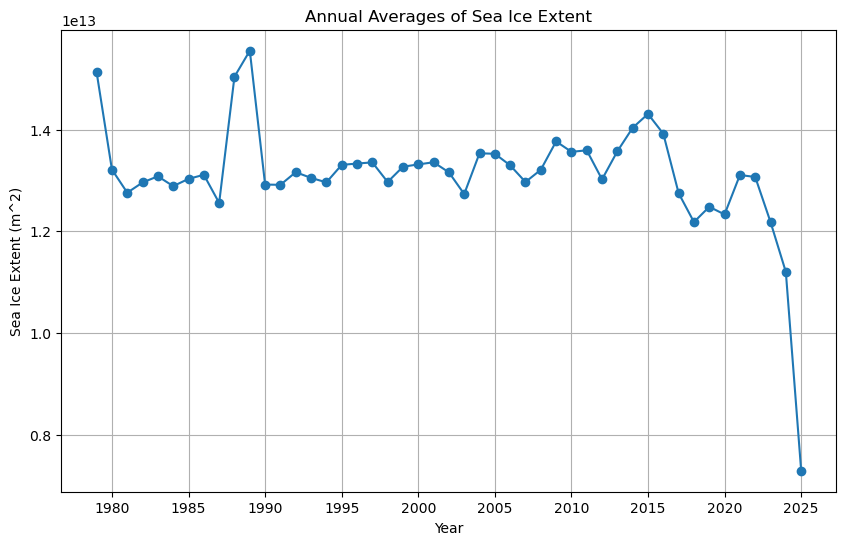

In [12]:
# Calculate annual averages of sea ice extent
annual_averages = sea_ice_extent.resample(time='A').mean()

# Create a line plot for annual averages
plt.figure(figsize=(10, 6))
plt.plot(annual_averages['time'], annual_averages, marker='o')
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (m^2)')
plt.title('Annual Averages of Sea Ice Extent')
plt.grid(True)
plt.show()

Note: something weird has happenned in 1978, 1987 and 1988, but that's not CoPilot's fault, that's probably an issue in our data. You can see the very worrying sea ice decline from 2016 onwards.

$\quad \quad$ **Me:** *Can you now plot each year's monthly values in the same plot, with a different color for each year. I want the colors to be chosen from a nice colorbar as time progresses.*

$\quad \quad$ **CoPilot:**

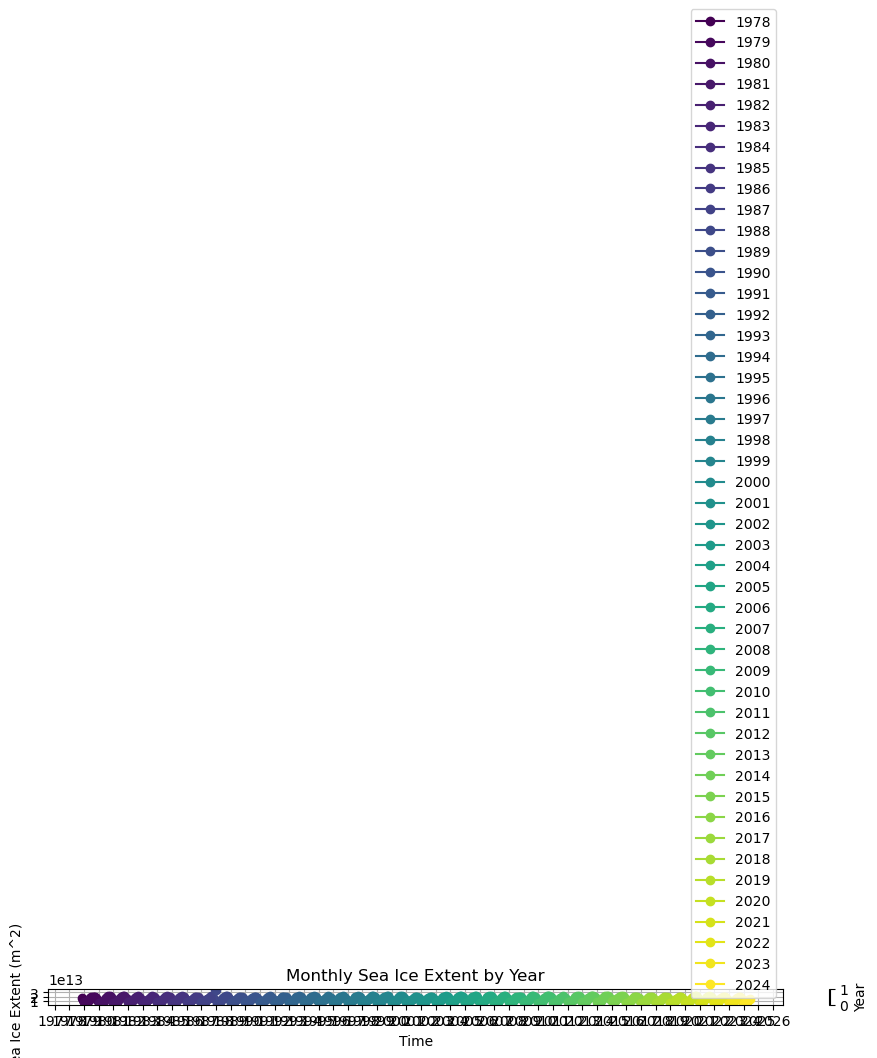

In [13]:
import matplotlib.dates as mdates

# Create a colormap for years
cmap = plt.get_cmap('viridis', len(annual_averages))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each year's monthly values
for i, (year, color) in enumerate(zip(annual_averages['time.year'], cmap.colors)):
    monthly_values = sea_ice_extent.sel(time=slice(str(year.item())+'-01-01', str(year.item())+'-12-31'))
    ax.plot(monthly_values['time'], monthly_values, marker='o', color=color, label=str(year.item()))

# Set x-axis formatting for dates
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Sea Ice Extent (m^2)')
ax.set_title('Monthly Sea Ice Extent by Year')
ax.grid(True)

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label='Year')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

Yuck. Not exactly what I wanted. Let's ammend.

$\quad \quad$ **Me:** *Can you iterate through each year in my sea_ice_extent time series, and plot in the same panel month vs sea_ice_extent? I'd like each year to have a different color, choosing from a nice sequential colorbar to show evolution of my variable.*

$\quad \quad$ **CoPilot:**

ValueError: x and y must have same first dimension, but have shapes (12,) and (2,)

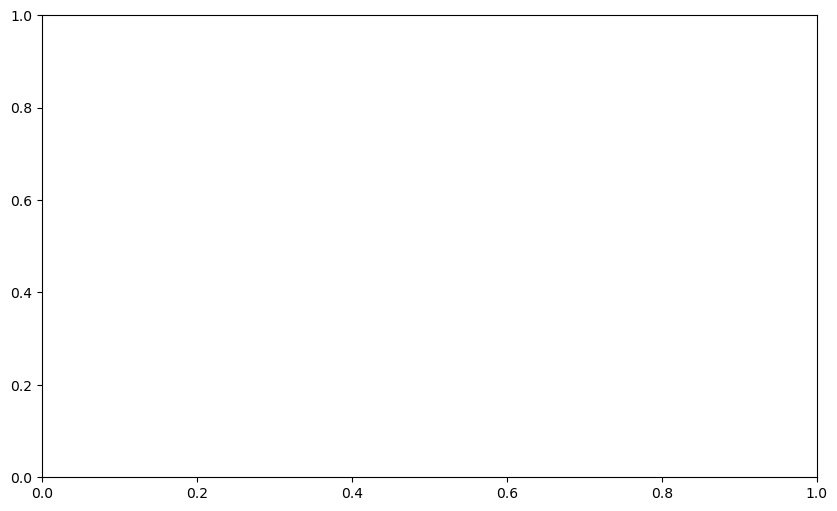

In [14]:
import numpy as np 

# Create a colormap for years
cmap = plt.get_cmap('viridis', len(annual_averages))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each year
for i, (year, color) in enumerate(zip(annual_averages['time.year'], cmap.colors)):
    monthly_values = sea_ice_extent.sel(time=slice(str(year.item())+'-01-01', str(year.item())+'-12-31'))
    ax.plot(np.arange(0,12,1), monthly_values, marker='o', color=color, label=str(year.item()))

# Set x-axis formatting for dates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sea Ice Extent (m^2)')
ax.set_title('Monthly Sea Ice Extent by Year')
ax.grid(True)

# Add colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label='Year')

# Show the legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

This is not working because 1978 has only 2 months. I know how to fix this. I'll add a line that ignores the weird years in our data. And I've also removed somethings from our plot that were making it confusing, etc, because at this stage it is just easier than asking CoPilot.

ValueError: x and y must have same first dimension, but have shapes (12,) and (6,)

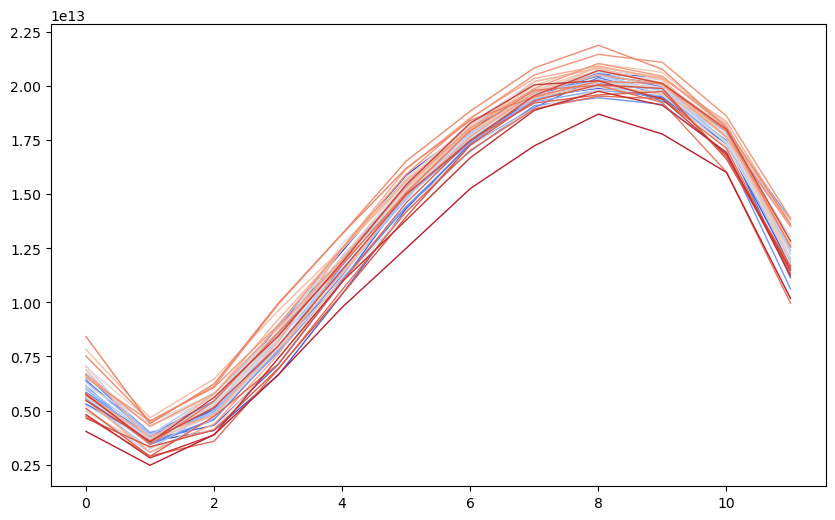

In [15]:
# Create a colormap for years
cmap = plt.get_cmap('coolwarm')(np.linspace(0,1,len(annual_averages)))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each year
for i, (year, color) in enumerate(zip(annual_averages['time.year'], cmap)):
    if year not in [1978, 1988, 1987]:
        monthly_values = sea_ice_extent.sel(time=slice(str(year.item())+'-01-01', str(year.item())+'-12-31')) 
        ax.plot(np.arange(0,12,1), monthly_values, color=color, label=str(year.item()), linewidth = 1)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sea Ice Extent (m^2)')
ax.set_title('Monthly Sea Ice Extent by Year')
ax.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

That is enough for the purpose of this tutorial. 

Good luck with CoPilot! **And remember that you are the only one that can actually understand concepts and think. CoPilot is just making (really good) guesses**.